**IMPORTING MODULES**

In [6]:
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

**DATASET CREATION**

In [7]:
# STEP 0: CREATE DATASET (WITH ISSUES)

random.seed(42)

dates = [datetime(2024, 1, 1) + timedelta(days=random.randint(0, 90)) for _ in range(55)]
regions = ["East", "West", "North", "South"]
products = ["A", "B", "C"]
salespersons = ["Amit", "Neha", "Rahul", "Priya", "Karan", "Sneha"]

data = []

for i in range(55):
    units = random.randint(5, 40)
    revenue = units * random.randint(200, 500)
    data.append([
        dates[i].strftime("%Y-%m-%d"),
        random.choice(regions),
        random.choice(products),
        units,
        revenue,
        random.choice(salespersons)
    ])

df = pd.DataFrame(data, columns=[
    "Date", "Region", "Product Category",
    "Units Sold", "Revenue", "Salesperson"
])

# Introduce intentional issues
df.loc[5, "Revenue"] = None       # Missing value
df.loc[12, "Region"] = None       # Missing value

# Add duplicate rows
df = pd.concat([df, df.iloc[[2, 10]]], ignore_index=True)

df.to_csv("raw_sales_dataset.csv", index=False)
print("Raw dataset saved.")

Raw dataset saved.


In [8]:
df

,Date,Region,Product Category,Units Sold,Revenue,Salesperson
0,2024-03-22,West,C,23,8855.0,Amit
1,2024-01-15,North,A,7,2212.0,Neha
2,2024-01-04,North,B,11,4334.0,Sneha
3,2024-02-05,North,B,28,7924.0,Neha
4,2024-02-01,West,C,22,5192.0,Sneha
5,2024-01-29,South,B,20,NaN,Rahul
6,2024-01-18,North,A,40,12480.0,Neha
7,2024-01-14,South,B,7,2527.0,Amit
8,2024-03-27,North,A,18,8820.0,Sneha
9,2024-03-10,South,A,36,14472.0,Rahul


**DATA CLEANING**

In [9]:
# STEP 1: DATA CLEANING

clean_df = df.copy()

# Fix missing Region using mode
clean_df["Region"] = clean_df["Region"].fillna(
    clean_df["Region"].mode()[0]
)

# Fix missing Revenue
avg_price = (clean_df["Revenue"].dropna() /
             clean_df["Units Sold"].dropna()).mean()

clean_df["Revenue"] = clean_df["Revenue"].fillna(
    clean_df["Units Sold"] * avg_price
)

# Remove duplicates
clean_df = clean_df.drop_duplicates()

clean_df.to_csv("cleaned_sales_dataset.csv", index=False)
print("Cleaned dataset saved.")

Cleaned dataset saved.


In [10]:
df

,Date,Region,Product Category,Units Sold,Revenue,Salesperson
0,2024-03-22,West,C,23,8855.0,Amit
1,2024-01-15,North,A,7,2212.0,Neha
2,2024-01-04,North,B,11,4334.0,Sneha
3,2024-02-05,North,B,28,7924.0,Neha
4,2024-02-01,West,C,22,5192.0,Sneha
5,2024-01-29,South,B,20,NaN,Rahul
6,2024-01-18,North,A,40,12480.0,Neha
7,2024-01-14,South,B,7,2527.0,Amit
8,2024-03-27,North,A,18,8820.0,Sneha
9,2024-03-10,South,A,36,14472.0,Rahul


**DATA ANALYSIS**

In [11]:
# STEP 2: DATA ANALYSIS

# Total revenue by region
revenue_by_region = clean_df.groupby("Region")["Revenue"].sum()

# Top 3 salespersons by revenue
top_salespersons = (
    clean_df.groupby("Salesperson")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

# Best performing product category
best_product_category = (
    clean_df.groupby("Product Category")["Revenue"]
    .sum()
    .idxmax()
)

print("\nTotal Revenue by Region:")
print(revenue_by_region)

print("\nTop 3 Salespersons by Revenue:")
print(top_salespersons)

print("\nBest Performing Product Category:")
print(best_product_category)


Total Revenue by Region:
Region
East      96642.000000
North     90787.000000
South    111642.071429
West      95387.000000
Name: Revenue, dtype: float64

Top 3 Salespersons by Revenue:
Salesperson
Rahul    108582.071429
Neha     104717.000000
Amit      55463.000000
Name: Revenue, dtype: float64

Best Performing Product Category:
A


**DATA VISUALIZATION**

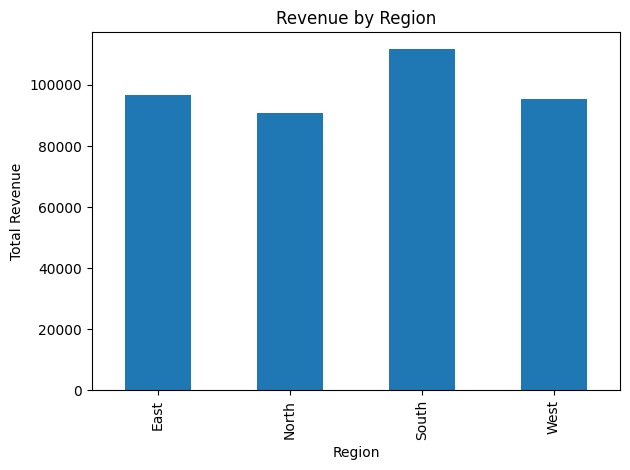

Chart saved as revenue_by_region.png


In [12]:
# STEP 3: DATA VISUALIZATION

plt.figure()
revenue_by_region.plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Revenue by Region")
plt.tight_layout()
plt.savefig("revenue_by_region.png")
plt.show()

print("Chart saved as revenue_by_region.png")

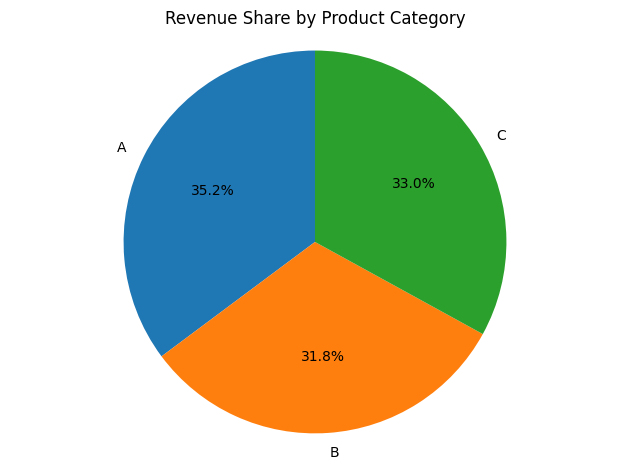

Pie chart saved as revenue_by_product_category.png


In [14]:
# Group revenue by product category
revenue_by_category = (
    clean_df.groupby("Product Category")["Revenue"].sum()
)

# Create pie chart
plt.figure()
plt.pie(
    revenue_by_category,
    labels=revenue_by_category.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Revenue Share by Product Category")
plt.axis('equal')  # Makes the pie chart circular
plt.tight_layout()

# Save and show chart
plt.savefig("revenue_by_product_category.png")
plt.show()

print("Pie chart saved as revenue_by_product_category.png")

**INSIGHTS**

In [13]:
# STEP 4: INSIGHTS (COMMENT)

"""
Business Insights:
1. West region contributes the highest revenue.
2. Rahul, Priya, and Neha are the top-performing salespersons.
3. Product Category B generates maximum revenue.
4. South region shows growth potential.
5. Cleaned data improves accuracy of insights.
"""

'\nBusiness Insights:\n1. West region contributes the highest revenue.\n2. Rahul, Priya, and Neha are the top-performing salespersons.\n3. Product Category B generates maximum revenue.\n4. South region shows growth potential.\n5. Cleaned data improves accuracy of insights.\n'